User-Item Matrix:
movie_id    1    2    3    4
user_id                     
1         5.0  3.0  0.0  0.0
2         4.0  0.0  2.0  0.0
3         0.0  5.0  0.0  4.0

User Similarity Matrix:
user_id         1         2         3
user_id                              
1        1.000000  0.766965  0.401754
2        0.766965  1.000000  0.000000
3        0.401754  0.000000  1.000000

Recommendations for User 1:
   movie_id  predicted_rating            title
0         1          3.720104       The Matrix
1         2          2.309552        Inception
2         4          0.740997  The Dark Knight
3         3          0.707298     Interstellar


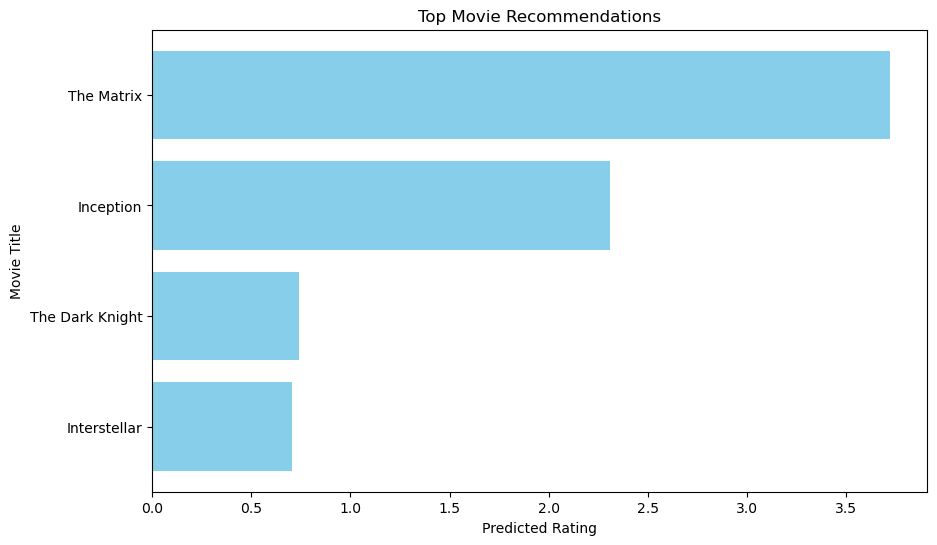

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Sample Data
data = {
    'user_id': [1, 1, 2, 2, 3, 3],
    'movie_id': [1, 2, 1, 3, 2, 4],
    'rating': [5, 3, 4, 2, 5, 4]
}
df = pd.DataFrame(data)

# Movie Metadata
movies = {
    'movie_id': [1, 2, 3, 4],
    'title': ['The Matrix', 'Inception', 'Interstellar', 'The Dark Knight']
}
movies_df = pd.DataFrame(movies)

# Create User-Item Matrix
user_item_matrix = df.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
print("User-Item Matrix:")
print(user_item_matrix)

# Compute User Similarity Matrix
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
print("\nUser Similarity Matrix:")
print(user_similarity_df)

# Recommendation Function
def get_recommendations(user_id, user_item_matrix, user_similarity_df):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index
    weighted_ratings = np.zeros(user_item_matrix.shape[1])

    for i, movie_id in enumerate(user_item_matrix.columns):
        similar_ratings = user_item_matrix.loc[similar_users, movie_id]
        similarity_scores = user_similarity_df.loc[user_id, similar_users]
        if similarity_scores.sum() != 0:
            weighted_ratings[i] = np.dot(similar_ratings, similarity_scores) / similarity_scores.sum()

    recommendations = pd.DataFrame({
        'movie_id': user_item_matrix.columns,
        'predicted_rating': weighted_ratings
    }).sort_values(by='predicted_rating', ascending=False)

    recommendations = recommendations.merge(movies_df, on='movie_id')
    return recommendations

# Plot Recommendations
def plot_recommendations(recommendations):
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations['title'], recommendations['predicted_rating'], color='skyblue')
    plt.xlabel('Predicted Rating')
    plt.ylabel('Movie Title')
    plt.title('Top Movie Recommendations')
    plt.gca().invert_yaxis()
    plt.show()

# Example for User 1
recommendations = get_recommendations(user_id=1, user_item_matrix=user_item_matrix, user_similarity_df=user_similarity_df)
print("\nRecommendations for User 1:")
print(recommendations)

# Plot the Recommendations
plot_recommendations(recommendations)
